In [14]:
import cv2
import os
import glob
from PIL import Image
from pathlib import Path
from matplotlib import pyplot as plt
from matplotlib.pyplot import figure
import numpy as np
import mahotas

In [6]:
ena_local = 'C:/temp/ena/images/train100/'
images = [os.path.split(i)[1] for i in glob.glob(ena_local + '/*.jpg', recursive=True)]

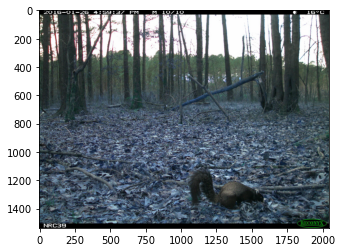

In [15]:
img = cv2.imread(ena_local + '432.jpg')
plt.imshow(img)

In [17]:
getHist = lambda x, y : cv2.calcHist(x, [y], None, [256], [0,256])
chists = np.stack((getHist(img, 0), getHist(img, 1), getHist(img, 2)))

In [22]:
mahotas.features.lbp.lpb(img, 1)

AttributeError: 'function' object has no attribute 'lpb'

In [34]:
t =  mahotas.features.lbp(img[:, :, 0], 2.5, 12)

In [38]:
mahotas.features.lbp(img[:, :, 0], 1, 8)

36

In [26]:
img.shape

(1536, 2048, 3)

In [64]:
# https://link.springer.com/article/10.1007/s11042-020-09698-5
def lbp_l2r(img, x, y):
    ylen = img.shape[1]
    pc = img[x, y,1]
    res = str()
    coords = [(-1, 1), (-1, 2), (0, 2), (1, 2), (1, 1), (1, 0), (0, 0), (-1, 0)]
    for coord in coords: 
        yoffset, layer = coord
        if y + yoffset == ylen or y + yoffset == 0:
            pi = -1
        else: 
            pi = img[x, y + yoffset, layer]
        res += (str(1 * (pi >= pc)))
    return int(res, 2)

In [65]:
# try/except= 1m46
# if else: 
fin = np.ndarray((img.shape[0], img.shape[1]))
for xi in range(img.shape[0]):
    for yi in range(img.shape[1]):
        fin[xi, yi] = lbp_l2r(img, xi, yi)

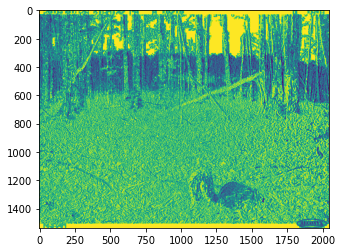

In [70]:
plt.imshow(fin)

In [68]:
cv2.imwrite('c:/temp/fin.jpg', fin)

True

In [43]:
x = "01001100"

76

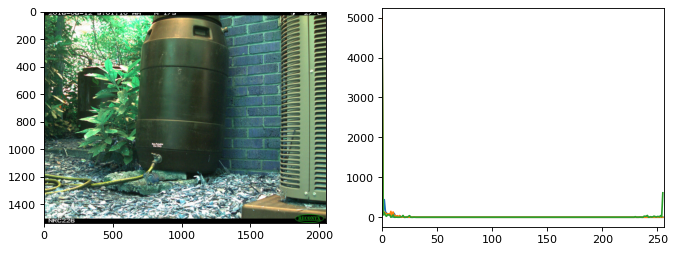

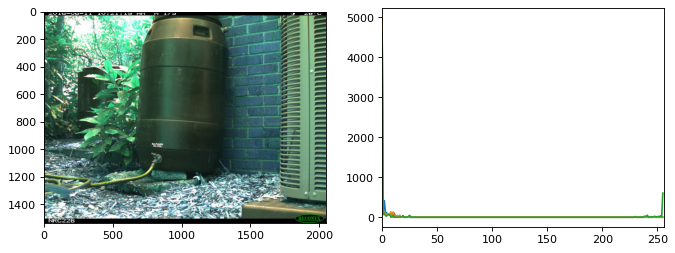

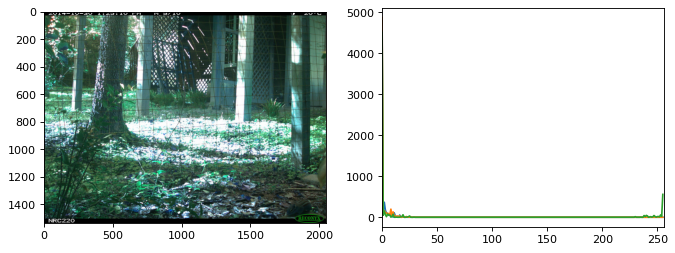

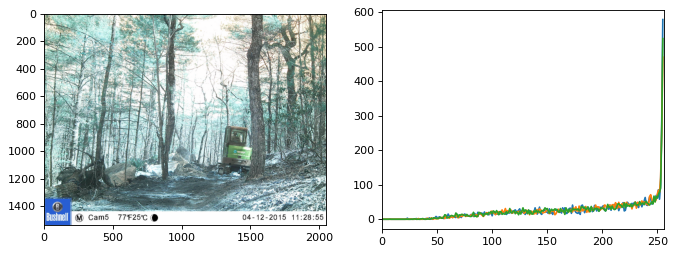

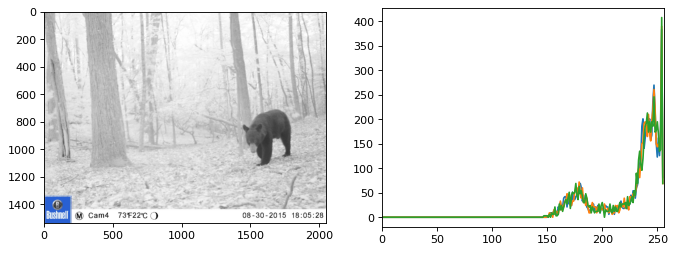

In [5]:
for i in (1,5,100,1213,5432):
    imx = images[i]
    img = cv2.imread(ena_local + imx)
    hist1 = cv2.calcHist(img, [0], None, [256], [0,256])
    hist2 = cv2.calcHist(img, [1], None, [256], [0,256])
    hist3 = cv2.calcHist(img, [2], None, [256], [0,256])
    figure(figsize=(10, 8), dpi=80)
    plt.subplot(221), plt.imshow(img)
    plt.subplot(222), plt.plot(hist1), plt.plot(hist2),plt.plot(hist3)
    plt.xlim([0,256])
    plt.show()

In [6]:
hist1.shape

(256, 1)

In [9]:
import numpy as np
import torch
import torch.nn as nn

In [10]:
# https://github.com/harryjdavies/Python1D_CNNs/blob/master/CCN1D_pytorch_activity.py
n_features = 256
class ConvNet1D(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer1 = nn.Sequential(
            nn.Conv1d(3, 3, 3),
            nn.ReLU(),
            nn.Dropout(0.5),
            nn.MaxPool1d(10))
        self.layer2 = nn.Flatten()
        self.layer3 = nn.Sequential(
            nn.Linear(768,100),
            nn.ReLU())
        self.layer4 = nn.Sequential(
            nn.Linear(100,6),
            nn.Softmax())

    def forward(self, x):
        out = self.layer1(x)
        out = self.layer2(out)
        out = self.layer3(out)
        out = self.layer4(out)
        return out

model = ConvNet1D()


In [19]:
hist4 = np.stack((hist1, hist2, hist3))

In [20]:
hist4 = torch.Tensor(hist4)

In [23]:
hist4 = hist4.permute(2,0,1)

In [24]:
model.forward(hist4)

RuntimeError: mat1 and mat2 shapes cannot be multiplied (1x75 and 768x100)

In [ ]:


# Loss and optimizer
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Train the model
total_step = len(trainX)

# transformation of data into torch tensors
trainXT = torch.from_numpy(trainX)
trainXT = trainXT.transpose(1,2).float() #input is (N, Cin, Lin) = Ntimesteps, Nfeatures, 128
trainyT = torch.from_numpy(trainy).float()
testXT = torch.from_numpy(testX)
testXT = testXT.transpose(1,2).float()
testyT = torch.from_numpy(testy).float()
num_epochs = 50
batch_size = 32

loss_list = []
acc_list = []
acc_list_epoch = []
for epoch in range(num_epochs):
    correct_sum = 0
    for i in range(int(np.floor(total_step/batch_size))): # split data into batches
        trainXT_seg = trainXT[i*batch_size:(i+1)*batch_size]
        trainyT_seg = trainyT[i*batch_size:(i+1)*batch_size]
        # Run the forward pass
        outputs = model(trainXT_seg)
        loss = criterion(outputs, torch.max(trainyT_seg, 1)[1])
        loss_list.append(loss.item())

        # Backprop and perform Adam optimisation
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        # Track the accuracy
        total = trainyT_seg.size(0)
        _, predicted = torch.max(outputs, 1)
        _, actual = torch.max(trainyT_seg, 1)
        correct = (predicted == actual).sum().item()
        correct_sum = correct_sum + (correct/total)
        acc_list.append(correct / total)
    print("Epoch")
    print(epoch)
    print("accuracy")
    print(correct_sum/int(np.floor(total_step/batch_size)))
    acc_list_epoch.append(correct_sum/int(np.floor(total_step/batch_size)))